## Parse Data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def list_to_plate(lst: pd.Series) -> pd.DataFrame:
    new_index = pd.MultiIndex.from_tuples([(i[0], int(i[1:])) for i in lst.index])
    plate =  pd.Series(lst.values, index=new_index).unstack()
    return plate

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'][:len(df.index)]
    return df

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax


In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pathlib import Path
DRIVE_FOLDER = Path('/content/drive/Shared drives/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240923_pVan_validation 2049 2054 2055-08-DP6')

!ls "{DRIVE_FOLDER}"

cts1 = pd.read_csv(DRIVE_FOLDER / '20240923 iDEC 2048 54 55 vanillic acid 18h.txt', sep='\t', header=1)[['Pos', 'Cp']]
cts1 = list_to_plate(cts1.set_index('Pos').Cp)
layout_plate1 = pd.read_excel(DRIVE_FOLDER / 'Layout plate 23.09.xlsx', header=None)




Mounted at /content/drive
 20240923_analysis.ipynb			  'Layout plate 23.09.xlsx'
'20240923 iDEC 2048 54 55 vanillic acid 18h.txt'


In [5]:
cts1

,1,2,3,5,6,7,9,10,11,12
A,22.35,22.10,22.45,23.05,22.89,22.51,21.89,22.32,22.04,28.29
B,22.96,22.83,23.07,23.67,23.61,22.93,20.45,19.35,18.55,28.42
C,22.93,23.00,22.94,23.64,23.79,23.89,23.22,23.30,23.27,28.44
D,22.43,22.84,22.95,23.75,23.70,23.18,20.69,20.61,21.89,28.61
E,22.52,23.04,20.09,27.16,28.89,28.70,19.57,18.59,20.67,28.61
F,23.15,22.80,23.03,24.85,23.85,23.76,23.10,23.32,23.21,28.54
G,22.52,22.93,22.78,23.25,22.57,22.85,23.04,23.07,23.10,NaN
H,7.99,8.71,8.41,9.80,9.68,9.95,8.12,7.60,8.16,NaN


In [6]:
cts = plate_to_list(cts1).reset_index().rename(columns={0: 'ct', 'index': 'well'})
cts

,well,ct
0,A1,22.35
1,A2,22.10
2,A3,22.45
3,A5,23.05
4,A6,22.89
...,...,...
73,H6,9.68
74,H7,9.95
75,H9,8.12
76,H10,7.60


In [7]:
def parse_plate(df, num_cols):
  pass

def parse_layout(layout: pd.DataFrame):
  idx = 0
  plates = []
  while idx < len(layout.index)-9:
    if layout.iloc[idx, 0] is not None:
      plate = set_plate_axes(layout.iloc[idx+2:idx+2+8, 1:1+12])
      print(plate)
      plate = plate_to_list(plate)
      plate.name = layout.iloc[idx,  0]
      plates.append(plate)
      idx += 11
    else:
      idx += 1
  return pd.concat(plates, axis=1)

meta_plate1 = parse_layout(layout_plate1).reset_index().rename(columns={'index': 'well'})
meta = meta_plate1


            1            2            3    4            5            6   \
A  2049-08-DP6  2049-08-DP6  2049-08-DP6  NaN  2049-08-DP6  2049-08-DP6   
B  2054-08-DP6  2054-08-DP6  2054-08-DP6  NaN  2054-08-DP6  2054-08-DP6   
C  2055-08-DP6  2055-08-DP6  2055-08-DP6  NaN  2055-08-DP6  2055-08-DP6   
D  2049-08-DP6  2049-08-DP6  2049-08-DP6  NaN  2049-08-DP6  2049-08-DP6   
E  2054-08-DP6  2054-08-DP6  2054-08-DP6  NaN  2054-08-DP6  2054-08-DP6   
F  2055-08-DP6  2055-08-DP6  2055-08-DP6  NaN  2055-08-DP6  2055-08-DP6   
G           LB           LB           LB  NaN           LB           LB   
H        S2208        S2208        S2208  NaN        S2208        S2208   

            7    8            9            10           11           12  
A  2049-08-DP6  NaN  2049-08-DP6  2049-08-DP6  2049-08-DP6  2049-08-DP6  
B  2054-08-DP6  NaN  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6  
C  2055-08-DP6  NaN  2055-08-DP6  2055-08-DP6  2055-08-DP6  2055-08-DP6  
D  2049-08-DP6  NaN  2049-08

In [8]:
df = pd.merge(cts, meta, on=['well'])
df

,well,ct,strain,Phage,van_acid_um,Tetracyclin,Time (h)
0,A1,22.35,2049-08-DP6,SIAH1,100,uninduced,18
1,A2,22.10,2049-08-DP6,SIAH1,100,uninduced,18
2,A3,22.45,2049-08-DP6,SIAH1,100,uninduced,18
3,A5,23.05,2049-08-DP6,TadA,100,uninduced,18
4,A6,22.89,2049-08-DP6,TadA,100,uninduced,18
...,...,...,...,...,...,...,...
73,H6,9.68,S2208,TadA,0,uninduced,18
74,H7,9.95,S2208,TadA,0,uninduced,18
75,H9,8.12,S2208,SIAH1 KO,0,uninduced,18
76,H10,7.60,S2208,SIAH1 KO,0,uninduced,18


In [9]:
df.strain.unique()

array(['2049-08-DP6', '2054-08-DP6', '2055-08-DP6', 'LB', 'S2208'],
      dtype=object)

## Fold change

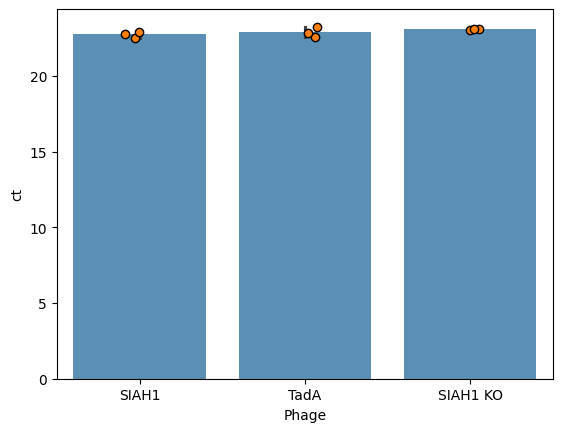

In [10]:
_ = bars(df[df.strain == 'LB'], x='Phage', y='ct')

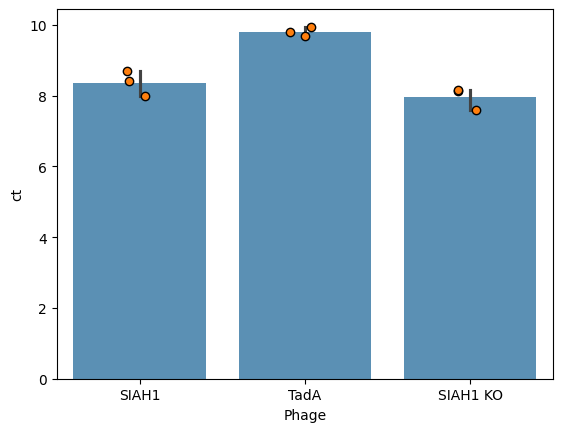

In [11]:
_ = bars(df[df.strain == 'S2208'], x='Phage', y='ct')

In [12]:
df['ct_init'] = pd.NA
for phage in df.Phage.unique():
  df.loc[df.Phage == phage, 'ct_init'] = df[(df.Phage == phage) & (df.strain == 'LB')].ct.mean()

df['fc_log2'] = df.ct_init - df.ct
df['fc'] = 2 ** df.fc_log2
df

,well,ct,strain,Phage,van_acid_um,Tetracyclin,Time (h),ct_init,fc_log2,fc
0,A1,22.35,2049-08-DP6,SIAH1,100,uninduced,18,22.743333,0.393333,1.313425
1,A2,22.10,2049-08-DP6,SIAH1,100,uninduced,18,22.743333,0.643333,1.561934
2,A3,22.45,2049-08-DP6,SIAH1,100,uninduced,18,22.743333,0.293333,1.225468
3,A5,23.05,2049-08-DP6,TadA,100,uninduced,18,22.89,-0.16,0.895025
4,A6,22.89,2049-08-DP6,TadA,100,uninduced,18,22.89,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
73,H6,9.68,S2208,TadA,0,uninduced,18,22.89,13.21,9475.589603
74,H7,9.95,S2208,TadA,0,uninduced,18,22.89,12.94,7858.291666
75,H9,8.12,S2208,SIAH1 KO,0,uninduced,18,23.07,14.95,31651.801626
76,H10,7.60,S2208,SIAH1 KO,0,uninduced,18,23.07,15.47,45387.267051


Text(0.5, 1.0, '2024.09.23 van100 -Tet')

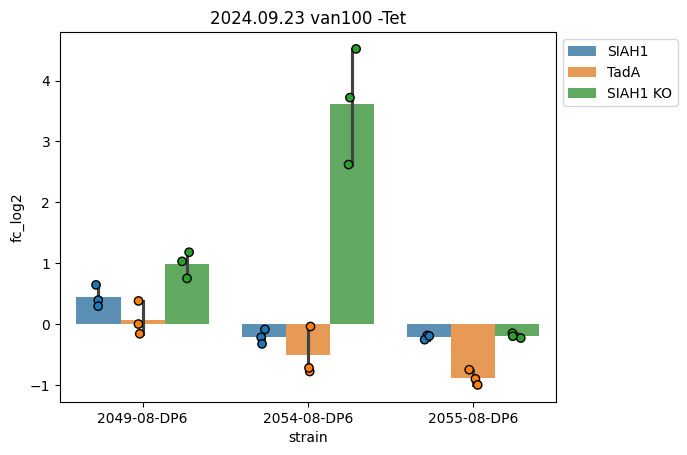

In [17]:
# SIAH KO looks weird, but it's the actual Ct that we're seeing.
ax = bars(df[(df.van_acid_um == 100)], x='strain', y='fc_log2', hue='Phage')
ax.set_title('2024.09.23 van100 -Tet')

Text(0.5, 1.0, '2024.09.23 +van -Tet')

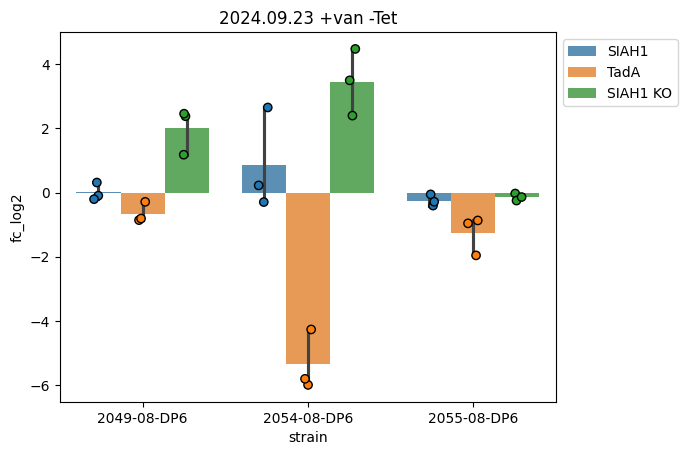

In [16]:
# TadA on looks weird, especially on 2054-08-DP6 -> most likely Michael forgot to add the phage to that row.
ax = bars(df[(df.van_acid_um == 500) & (df.Phage != 'no phage')], x='strain', y='fc_log2', hue='Phage')
ax.set_title('2024.09.23 +van -Tet')
